# `Bank Marketing Campaign`

**Context**

Jenis produk keuangan yang digunakan masyarakat lebih bervariasi. Salah satu produk keuangan yang cukup dikenal masyarakat adalah term deposit. Mekanisme term deposit adalah nasabah menyimpan sejumlah uang di bank atau lembaga keuangan, dan uang tersebut hanya dapat ditarik setelah jangka waktu tertentu. Sebagai kompensasinya, nasabah akan diberikan bunga tetap sesuai dengan nominal uang yang disetorkan.

Namun demikian, sebagai badan usaha dengan produk keuangan dan nasabahnya masing-masing, bank tetap harus bersaing agar tidak kehilangan nasabah. Salah satu cara untuk mendapatkan pelanggan baru adalah dengan melakukan kampanye pemasaran.

**Target**

0 : Tidak melakukan deposit

1 : Melakukan deposit


**Problem Statement**

Biaya pemasaran bisa lebih besar jika perusahaan menargetkan nasabah tanpa melakukan skrining terlebih dahulu. Perusahaan ingin meningkatkan efisiensi pemasaran produk keuangan deposito dengan mengetahui nasabah mana yang tertarik berinvestasi dengan pendekatan deposito.

Dan jika biaya admin deposito diberikan secara gratis kepada semua calon/nasabah, maka biaya tersebut akan menjadi sia-sia jika calon/nasabah yang mendaftar tersebut memiliki jangka waktu deposit yang rendah dan dapat merugikan bank tersebut.

**Goals**

Maka berdasarkan permasalahan tersebut, bank ingin memiliki kemampuan untuk memprediksi kemungkinan seorang nasabah akan/ingin melakukan deposit di bank atau tidak, sehingga dapat memfokuskan pemasaran pada nasabah yang ingin melakukan deposit di bank tersebut.

Dan juga, perusahaan ingin mengetahui apa/faktor/variabel apa yang membuat seorang nasabah melakukan deposit atau tidak, sehingga mereka dapat membuat rencana yang lebih baik dalam mendekati nasabah potensial (nasabah yang ingin memiliki produk keuangan deposito).

**Analytic Approach**

Hal yang dilakukan adalah menganalisis data untuk menemukan pola yang membedakan nasabah yang mau berinvestasi dengan produk deposito dan yang tidak tertarik dengan produk deposito.

Kemudian akan dibuat model klasifikasi yang akan membantu bank untuk dapat memprediksi probabilitas seorang nasabah akan/ingin melakukan deposito di bank tersebut atau tidak.

**Metric Evaluation**

Type 1 error : False Positive  
Konsekuensi: sia-sianya biaya marketing, waktu dan sumber daya

Type 2 error : False Negative  
Konsekuensi: kehilangan calon nasabah potensial 

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi biaya pemasaran dari bank tersebut, tetapi tanpa menyebabkan berkurangnya kandidat nasabah potensial yang dibutuhkan bank. Jadi, akan dilakukan prediksi kelas *true positive*, dengan seminim mungkin prediksi *false positive*. Metric utama yang akan digunakan adalah roc_auc.

**Features**

**Profil Nasabah :**
-	umur
-	pekerjaan
-	balance
-	rumah
-	pinjaman

**Marketing data :**
- kontak: Jenis komunikasi kontak.
- bulan: Bulan kontak terakhir dalam setahun.
- kampanye: Jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini.
- *pdays*: Jumlah hari setelah klien dihubungi dari kampanye sebelumnya.
- *poutcome*: Hasil dari kampanye pemasaran sebelumnya.
- deposit: Apakah nasabah melakukan deposit atau tidak.

## Data Understanding

### Attribute Information

Header | Definition
---|--------- 
`Age`| Age of customer |
`Job` | Job of customer |
`Housing` | If costumer has housing loan |
`Loan` | Has Personal Loan |
`Balance` |Customer's individual balance |
`Contact` | Communication type |
`Month` |  Last contact month of year | 
`Campaign` | Number of contacts performed during this campaign and for this client |
`Pdays` | Number of days that passed by after the client was last contacted from a previous campaign |
`Poutcome` |outcome of the previous marketing campaign |
`Deposit` | has the client subscribed a term deposit |

In [1]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data_bank_marketing_campaign.csv')
display(df.head(),df.tail())

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no
7812,60,retired,1588,no,no,cellular,oct,1,-1,unknown,yes


## Data Understanding

In [4]:
#Converting dependent variable categorical to dummy
deposit = pd.get_dummies(df['deposit'], columns = ['deposit'], prefix = ['deposit'], drop_first = True)
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [5]:
# take a look at the type, number of columns, entries, null values etc..
df.info()
# df.isnull().any() # one way to search for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [6]:
df.columns

Index(['age', 'job', 'balance', 'housing', 'loan', 'contact', 'month',
       'campaign', 'pdays', 'poutcome', 'deposit'],
      dtype='object')

In [69]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,75,"[93, 40]"
1,job,object,0,0.0,12,"[unknown, retired]"
2,balance,int64,0,0.0,3153,"[8379, 428]"
3,housing,object,0,0.0,2,"[yes, no]"
4,loan,object,0,0.0,2,"[yes, no]"
5,contact,object,0,0.0,3,"[unknown, telephone]"
6,month,object,0,0.0,12,"[jan, may]"
7,campaign,int64,0,0.0,32,"[2, 10]"
8,pdays,int64,0,0.0,422,"[515, 391]"
9,poutcome,object,0,0.0,4,"[other, success]"


#### Check data

In [70]:
# target class count
df["deposit"].value_counts()

no     4081
yes    3732
Name: deposit, dtype: int64

In [71]:
# percentage of class present in target variable (deposit) 
print("percentage of NO and YES\n",df["deposit"].value_counts()/len(df)*100)

percentage of NO and YES
 no     52.233457
yes    47.766543
Name: deposit, dtype: float64


Distribusi kelas dalam variabel target adalah ~52:48 yang menunjukkan dataset seimbang

## Data Cleaning

In [68]:
print('Kolom dengan data kosong:',df.isnull().sum(), sep = '\n')

Kolom dengan data kosong:
age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64


Tidak ada data yang hilang/kosong maka semua datanya siap pakai untuk melakukan analisa terhadap masalahnya dan juga pembuatan model machine learningnya.

### Handling outliers

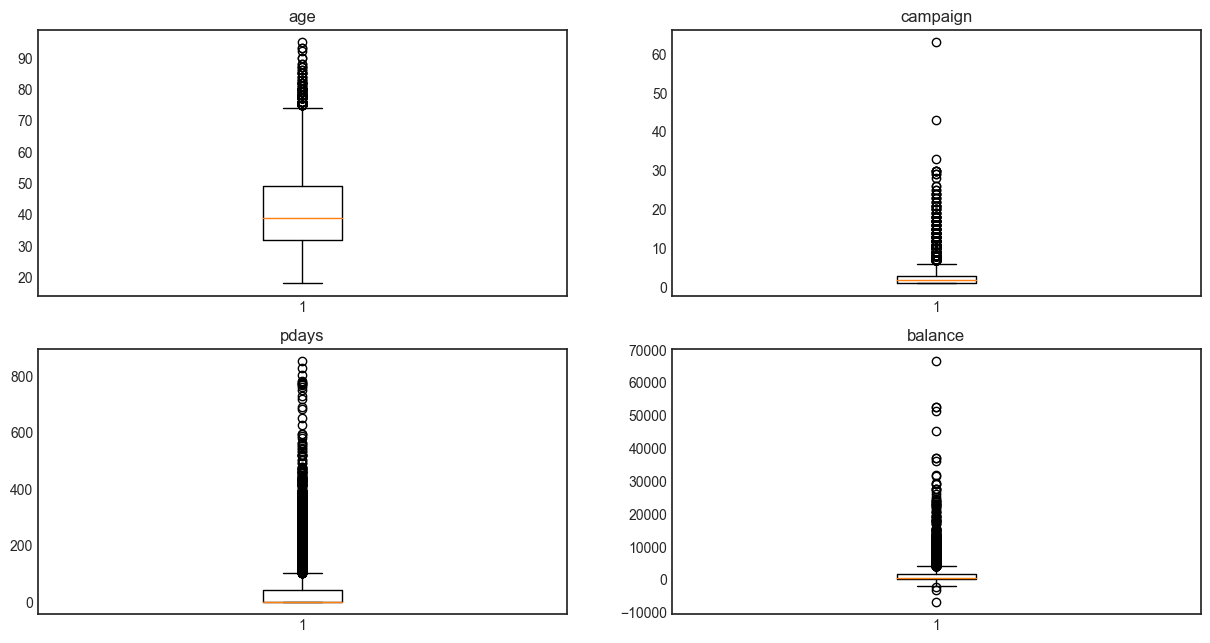

In [97]:
plt.figure(figsize = (15, 20))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(df['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(df['campaign'])
ax.set_title('campaign')
ax=plt.subplot(523)
plt.boxplot(df['pdays'])
ax.set_title('pdays')
ax=plt.subplot(524)
plt.boxplot(df['balance'])
ax.set_title('balance')
ax=plt.subplot(522)

Berdasarkan analisa terlihat bahwa banyak fitur memiliki banyak outliers. Oleh karena itu, fitur-fitur tersebut akan diperbaiki menggunakan metode IQR

In [98]:
numerical_features=['age','campaign','pdays', 'balance']
for cols in numerical_features:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df[cols] >= Q1 - 1.5 * IQR) & (df[cols] <= Q3 + 1.5 *IQR)
    df=df.loc[filter]

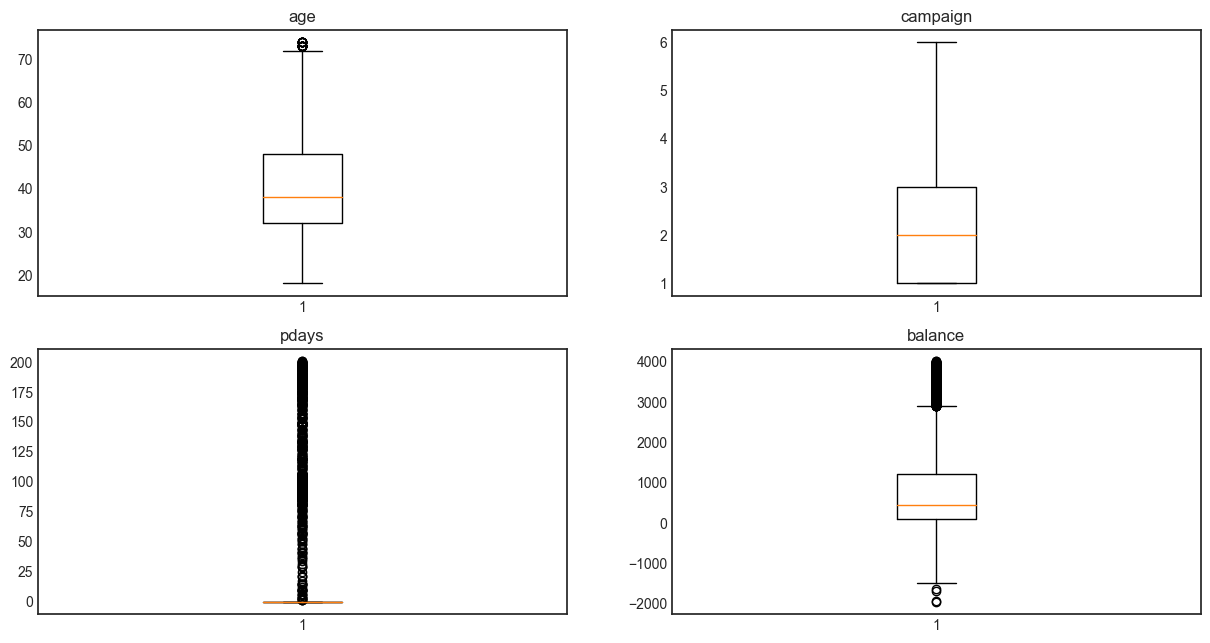

In [99]:
plt.figure(figsize = (15, 20))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(df['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(df['campaign'])
ax.set_title('campaign')
ax=plt.subplot(523)
plt.boxplot(df['pdays'])
ax.set_title('pdays')
ax=plt.subplot(524)
plt.boxplot(df['balance'])
ax.set_title('balance')
ax=plt.subplot(522)

Data outlier telah dihapus dan dataset dapat digunakan ke tahap analisa dan feature engineering.

## Data Analysis

In [72]:
display(df.describe(), df.describe(include='object'))

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


In [73]:
print ('-'*60,'Skewness Data','-'*60)
display(df.skew(axis=0))
print ('''
Nilai Skew Yang Positif = Right Skewed
Nilai Skew Yang Negatif = Left Skewed
''')

------------------------------------------------------------ Skewness Data ------------------------------------------------------------


age         0.867620
balance     6.760662
campaign    5.538156
pdays       2.411313
dtype: float64


Nilai Skew Yang Positif = Right Skewed
Nilai Skew Yang Negatif = Left Skewed



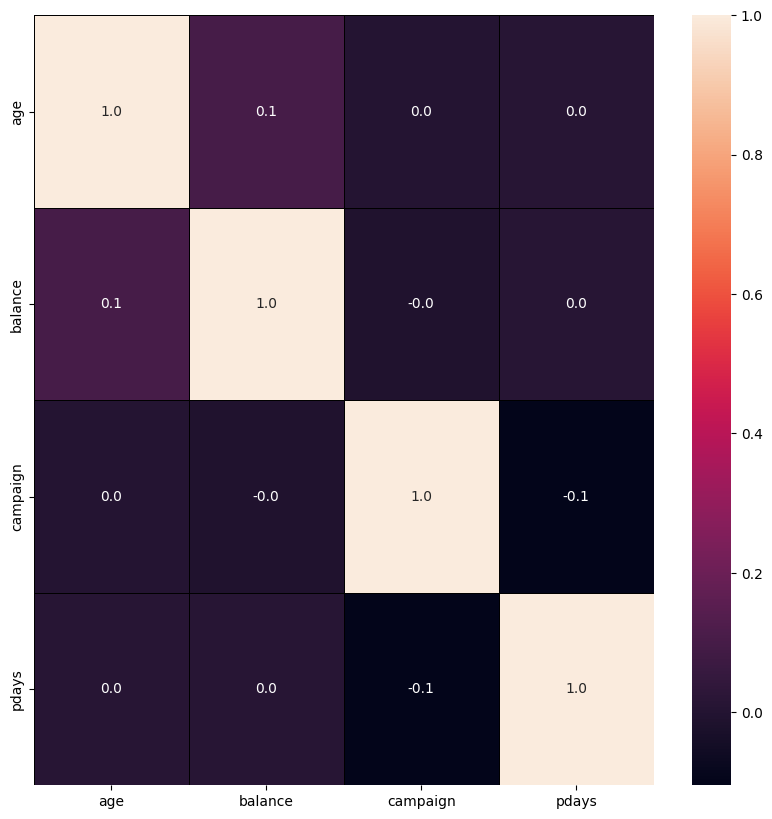

In [74]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

In [8]:
bank_client = df.iloc[: , 0:5]
bank_client.head()

,age,job,balance,housing,loan
0,55,admin.,1662,no,no
1,39,self-employed,-3058,yes,yes
2,51,admin.,3025,no,no
3,38,services,-87,yes,no
4,36,housemaid,205,yes,no


In [9]:
# knowing the categorical variables
print('Jobs:\n', bank_client['job'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Jobs:
 ['admin.' 'self-employed' 'services' 'housemaid' 'technician' 'management'
 'student' 'blue-collar' 'entrepreneur' 'retired' 'unemployed' 'unknown']
Housing:
 ['no' 'yes']
Loan:
 ['no' 'yes']


In [10]:
#Trying to find some strange values or null values
print('Min age: ', bank_client['age'].max())
print('Max age: ', bank_client['age'].min())
print('Null Values: ', bank_client['age'].isnull().any())

Min age:  95
Max age:  18
Null Values:  False


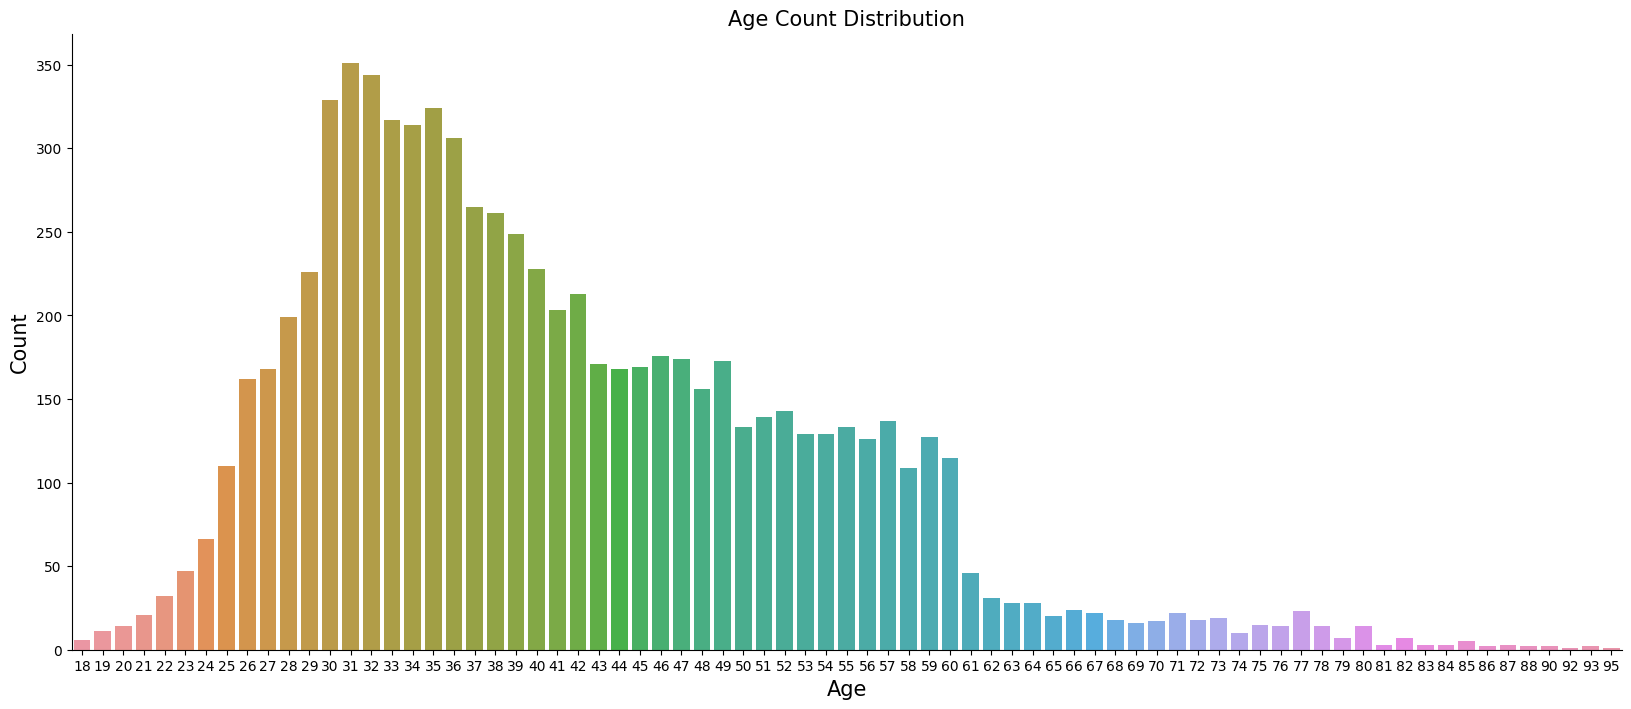

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

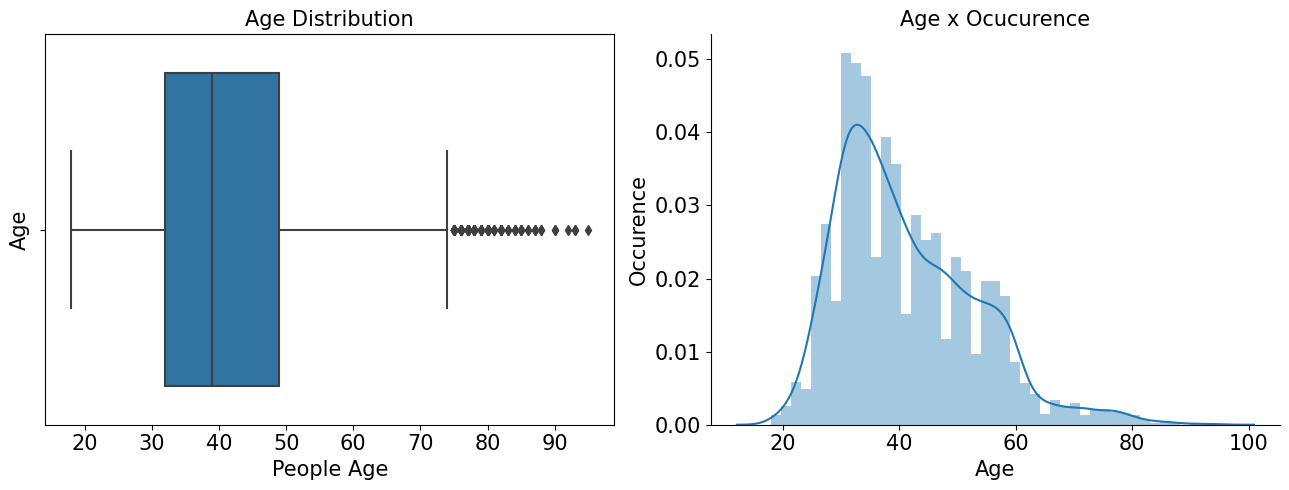

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [13]:
# Quartiles
print('1º Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2º Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3º Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4º Quartile: ', bank_client['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  32.0
2º Quartile:  39.0
3º Quartile:  49.0
4º Quartile:  95.0
Ages above:  74.5 are outliers


In [14]:
print('Numerber of outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Numerber of outliers:  207
Number of clients:  7813
Outliers are: 2.65 %


In [15]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(bank_client['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(bank_client['age'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), ', High middle dispersion')

MEAN: 41.3
STD : 11.9
CV  : 28.9 , High middle dispersion


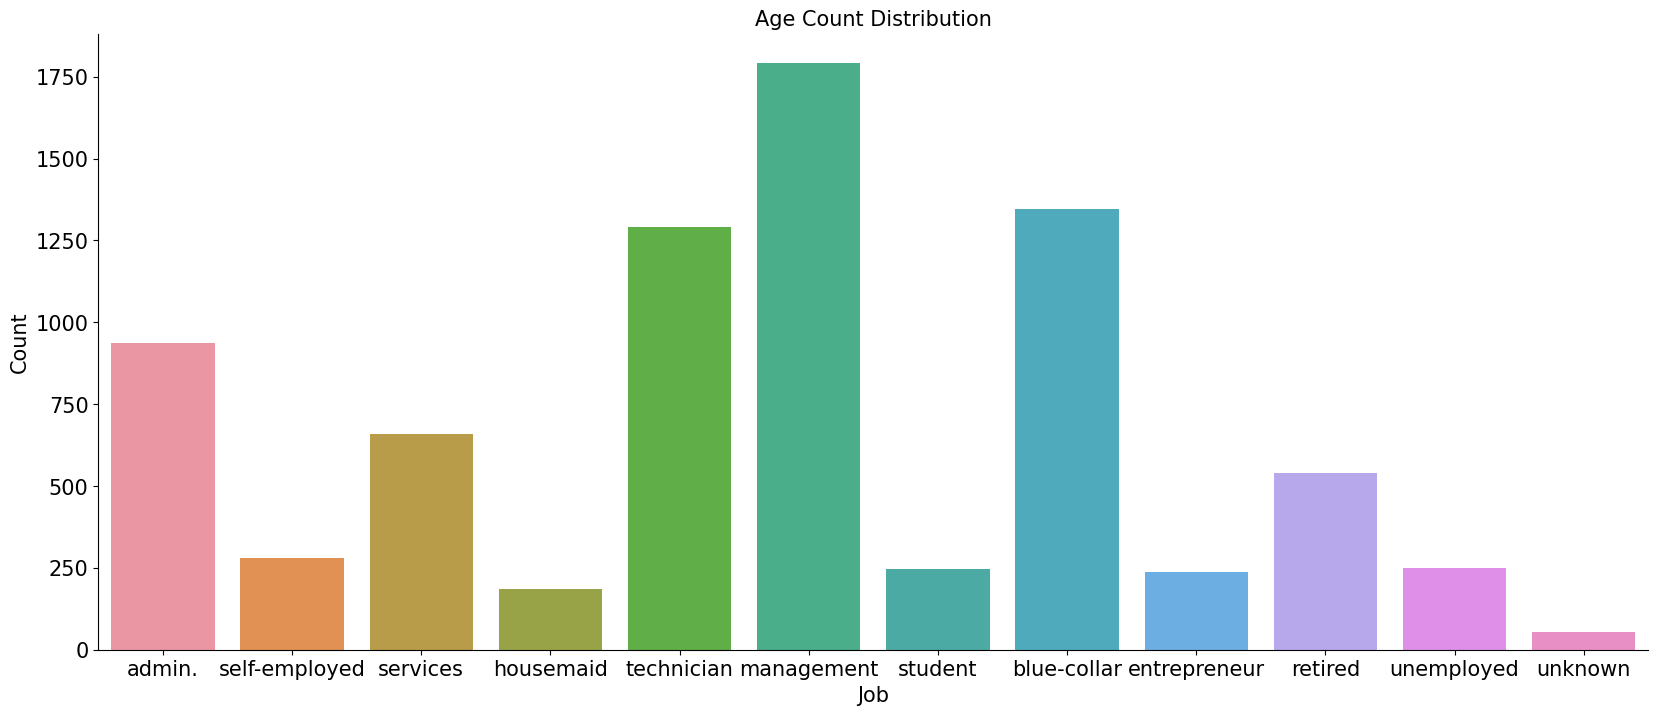

In [16]:
# What kind of jobs clients this bank have
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

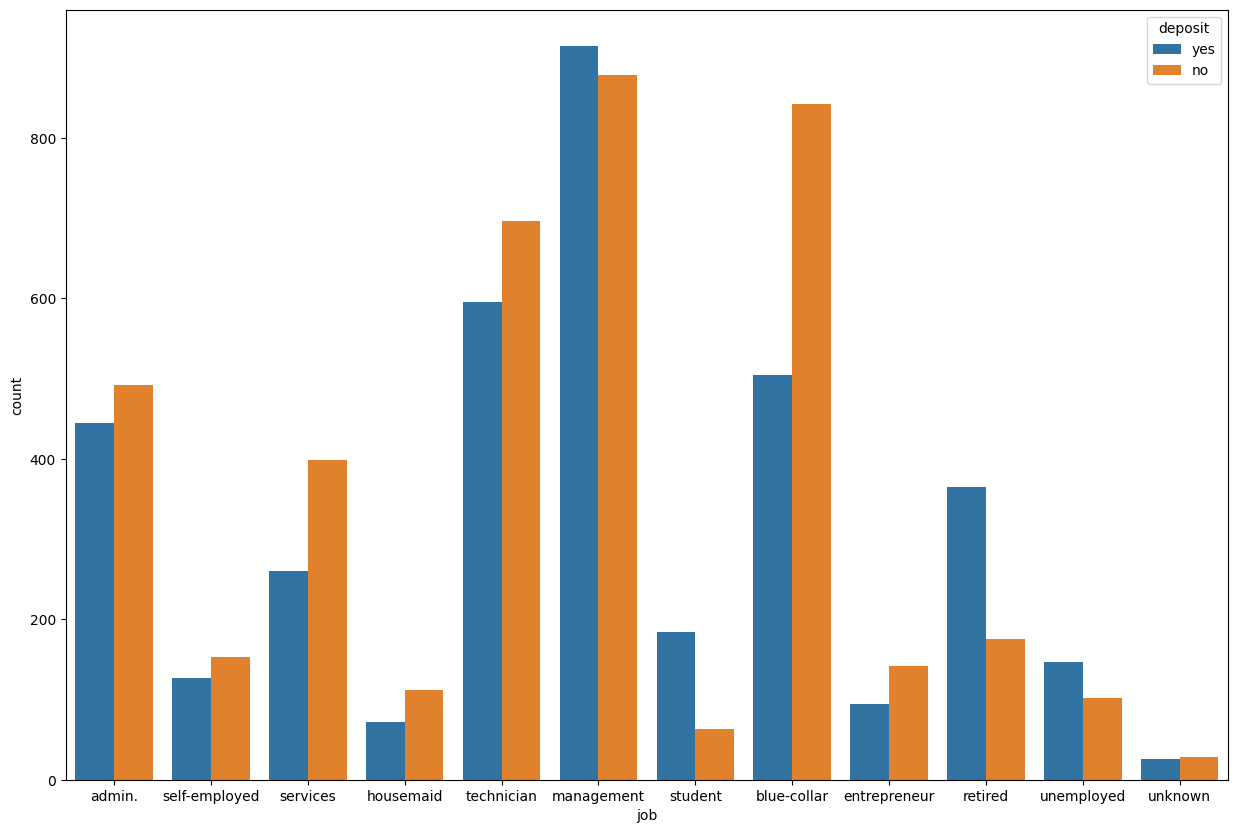

In [96]:
plt.figure(figsize=(15,10))
sns.countplot(x="job",hue="deposit",data=df)
plt.show()

Jenis pekerjaan yang dimiliki oleh nasabah bank yang berminat dengan deposito adalah management, technician, blue-collar, admin, dan retired

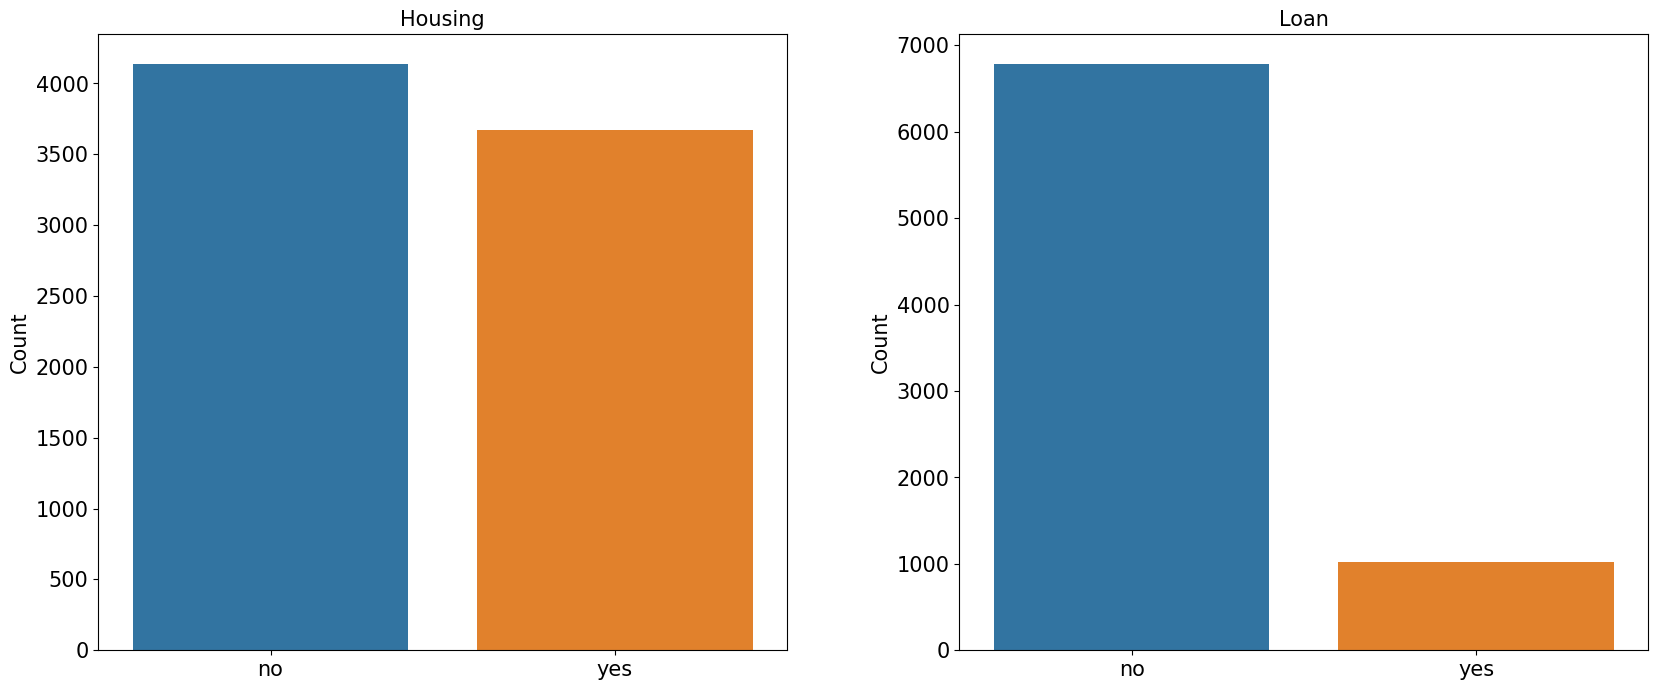

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client, ax = ax1, order = ['no', 'yes'])
ax1.set_title('Housing', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client, ax = ax2, order = ['no', 'yes'])
ax2.set_title('Loan', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [20]:
print('Housing:\n No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())

Housing:
 No housing in loan: 4140 
 Yes to housing in loan: 3673


In [21]:
print('Housing:\n No to personal loan:'     , bank_client[bank_client['loan'] == 'no']     ['age'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['loan'] == 'yes']    ['age'].count())

Housing:
 No to personal loan: 6789 
 Yes to personal loan: 1024


## Feature selection & Feature Engineering

In [24]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

In [25]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 49), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 49) & (dataframe['age'] <= 75), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 75) & (dataframe['age'] <= 95), 'age'] = 4
           
    return dataframe

age(bank_client);

In [26]:
print(bank_client.shape)
bank_client.head()

(7813, 5)


,age,job,balance,housing,loan
0,3,0,1662,0,0
1,2,6,-3058,1,1
2,3,0,3025,0,0
3,2,7,-87,1,0
4,2,3,205,1,0


Fitur encoding untuk fitur-fitur categorical yang terdapat pada dataset.

- Merubah fitur/kolom `job` menggunakan Label Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat.
- Merubah fitur/kolom `housing` menggunakan Label Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
- Merubah fitur/kolom `loan` menggunakan Label Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.

In [23]:
# Slicing DataFrame to treat separately, make things more easy
bank_related = df.iloc[: , 5:7]
bank_related.head()

,contact,month
0,cellular,jun
1,cellular,apr
2,cellular,may
3,cellular,may
4,telephone,nov


In [27]:
bank_related.isnull().any()

contact    False
month      False
dtype: bool

In [28]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())

Kind of Contact: 
 ['cellular' 'telephone' 'unknown']

Which monthis this campaing work: 
 ['jun' 'apr' 'may' 'nov' 'jan' 'sep' 'feb' 'mar' 'aug' 'jul' 'oct' 'dec']


In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related['month'], ax = ax2, order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

In [31]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 

In [32]:
bank_related.head()

,contact,month
0,0,6
1,0,0
2,0,8
3,0,8
4,1,9


In [33]:
bank_o = df.loc[: , ['campaign', 'pdays', 'poutcome']]
bank_o.head()

,campaign,pdays,poutcome
0,2,-1,unknown
1,3,-1,unknown
2,1,352,other
3,1,-1,unknown
4,4,-1,unknown


In [34]:
bank_o['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [35]:
bank_o['poutcome'].replace(['unknown', 'other', 'failure', 'success'], [1,2,3,4], inplace  = True)

## Algorithm & Evaluation Metrics

In [36]:
bank_final= pd.concat([bank_client, bank_related, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'housing', 'loan',
                     'contact', 'month', 'campaign', 'pdays', 'poutcome']]
bank_final.shape

(7813, 9)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, deposit, test_size = 0.1942313295, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [39]:
X_train.head()

,age,job,housing,loan,contact,month,campaign,pdays,poutcome
5772,2,1,1,1,2,6,2,-1,1
7460,3,3,0,0,2,6,2,-1,1
3704,2,9,1,0,0,5,1,-1,1
7562,2,1,1,0,0,9,1,197,4
486,3,5,1,0,0,9,1,57,4


In [47]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [48]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[582 206]
 [276 454]]
68.0


In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[648 140]
 [336 394]]
69.0


In [50]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[496 292]
 [328 402]]
59.0


In [51]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[584 204]
 [295 435]]
67.0


In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[588 200]
 [276 454]]
69.0


In [53]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[525 263]
 [227 503]]
68.0


In [54]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[637 151]
 [284 446]]
71.0


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[677 111]
 [298 432]]
73.0


In [56]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
7,Gradient Boosting,0.713747
6,XGBoost,0.704534
3,K-Near Neighbors,0.677048
0,Random Forest Classifier,0.664500
4,Logistic Model,0.662908
5,Gausian NB,0.657190
1,Decision Tree Classifier,0.642739
2,Support Vector Machine,0.567601


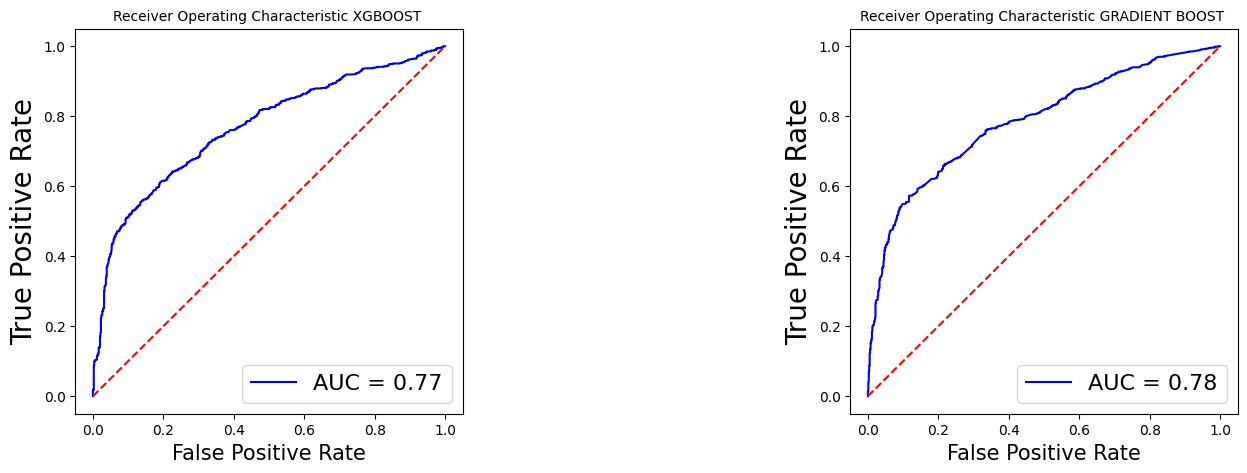

In [57]:
# XGBOOST ROC/ AUC , BEST MODEL
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

#Gradient
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

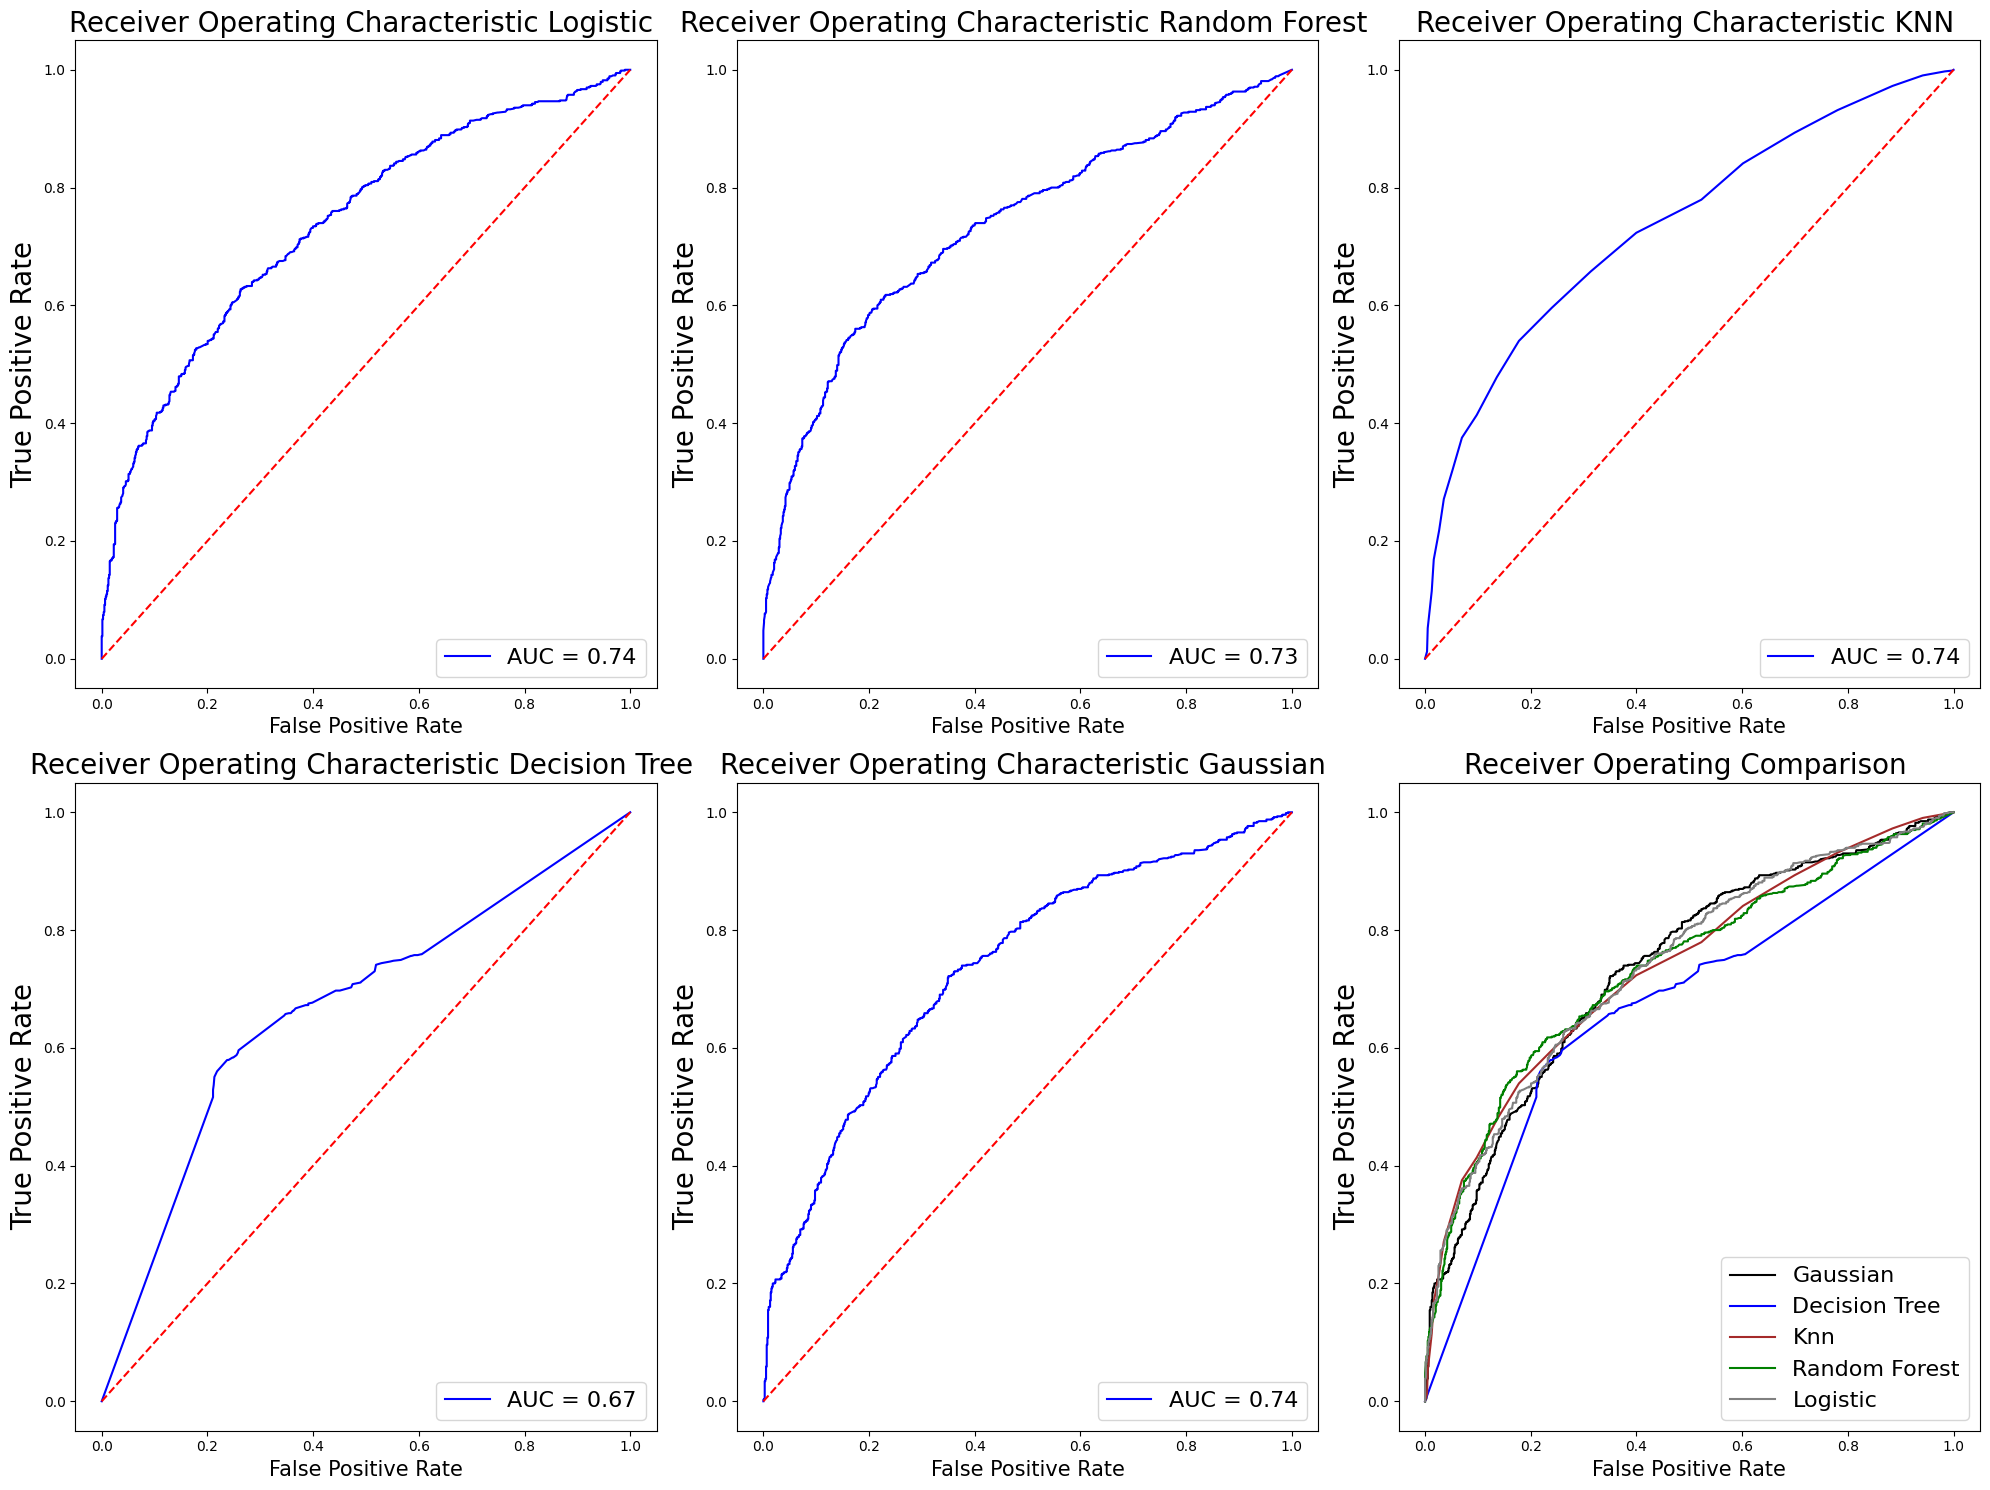

In [58]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

In [59]:
from sklearn.metrics import classification_report

In [60]:
print('KNN Confusion Matrix\n', confusion_matrix(y_test, knnpred))

print('KNN Reports\n',classification_report(y_test, knnpred))

KNN Confusion Matrix
 [[648 140]
 [336 394]]
KNN Reports
               precision    recall  f1-score   support

           0       0.66      0.82      0.73       788
           1       0.74      0.54      0.62       730

    accuracy                           0.69      1518
   macro avg       0.70      0.68      0.68      1518
weighted avg       0.70      0.69      0.68      1518



In [61]:
print('SVC Confusion Matrix\n', confusion_matrix(y_test, svcpred))

print('SVC Reports\n',classification_report(y_test, svcpred))

SVC Confusion Matrix
 [[496 292]
 [328 402]]
SVC Reports
               precision    recall  f1-score   support

           0       0.60      0.63      0.62       788
           1       0.58      0.55      0.56       730

    accuracy                           0.59      1518
   macro avg       0.59      0.59      0.59      1518
weighted avg       0.59      0.59      0.59      1518



In [62]:
print('Decision Tree Confusion Matrix\n', confusion_matrix(y_test, dtreepred))

print('Decision Tree Reports\n',classification_report(y_test, dtreepred))

Decision Tree Confusion Matrix
 [[584 204]
 [295 435]]
Decision Tree Reports
               precision    recall  f1-score   support

           0       0.66      0.74      0.70       788
           1       0.68      0.60      0.64       730

    accuracy                           0.67      1518
   macro avg       0.67      0.67      0.67      1518
weighted avg       0.67      0.67      0.67      1518



In [63]:
print('Random Forest Confusion Matrix\n', confusion_matrix(y_test, rfcpred))

print('Random Forest Reports\n',classification_report(y_test, rfcpred))

Random Forest Confusion Matrix
 [[588 200]
 [276 454]]
Random Forest Reports
               precision    recall  f1-score   support

           0       0.68      0.75      0.71       788
           1       0.69      0.62      0.66       730

    accuracy                           0.69      1518
   macro avg       0.69      0.68      0.68      1518
weighted avg       0.69      0.69      0.69      1518



In [64]:
print('Gaussian NB Confusion Matrix\n', confusion_matrix(y_test, gaussiannbpred))

print('Gaussian NB Reports\n',classification_report(y_test, gaussiannbpred))

Gaussian NB Confusion Matrix
 [[525 263]
 [227 503]]
Gaussian NB Reports
               precision    recall  f1-score   support

           0       0.70      0.67      0.68       788
           1       0.66      0.69      0.67       730

    accuracy                           0.68      1518
   macro avg       0.68      0.68      0.68      1518
weighted avg       0.68      0.68      0.68      1518



In [65]:
print('XGBClassifier Confusion Matrix\n', confusion_matrix(y_test, xgbprd))

print('XGBClassifier Reports\n',classification_report(y_test, xgbprd))

XGBClassifier Confusion Matrix
 [[637 151]
 [284 446]]
XGBClassifier Reports
               precision    recall  f1-score   support

           0       0.69      0.81      0.75       788
           1       0.75      0.61      0.67       730

    accuracy                           0.71      1518
   macro avg       0.72      0.71      0.71      1518
weighted avg       0.72      0.71      0.71      1518



In [66]:
print('XGBClassifier Confusion Matrix\n', confusion_matrix(y_test, xgbprd))

print('XGBClassifier Reports\n',classification_report(y_test, xgbprd))

XGBClassifier Confusion Matrix
 [[637 151]
 [284 446]]
XGBClassifier Reports
               precision    recall  f1-score   support

           0       0.69      0.81      0.75       788
           1       0.75      0.61      0.67       730

    accuracy                           0.71      1518
   macro avg       0.72      0.71      0.71      1518
weighted avg       0.72      0.71      0.71      1518



In [67]:
print('GradientBoosting Confusion Matrix\n', confusion_matrix(y_test, gbkpred))

print('GradientBoosting Reports\n',classification_report(y_test, gbkpred))

GradientBoosting Confusion Matrix
 [[677 111]
 [298 432]]
GradientBoosting Reports
               precision    recall  f1-score   support

           0       0.69      0.86      0.77       788
           1       0.80      0.59      0.68       730

    accuracy                           0.73      1518
   macro avg       0.74      0.73      0.72      1518
weighted avg       0.74      0.73      0.73      1518



In [75]:
gbk = GradientBoostingClassifier()
gbk.fit(X_test,y_test)

y_pred=gbk.predict(X_test)
y_true=pd.DataFrame(y_test)
from sklearn.metrics import classification_report
cr=classification_report(y_true,y_pred,output_dict=True)
pd.DataFrame(cr)

,0,1,accuracy,macro avg,weighted avg
precision,0.735326,0.829604,0.77141,0.782465,0.780664
recall,0.874365,0.660274,0.77141,0.767320,0.771410
f1-score,0.798841,0.735317,0.77141,0.767079,0.768292
support,788.000000,730.000000,0.77141,1518.000000,1518.000000


In [94]:
X = df.drop(['deposit'], axis=1)

features=[]
for columns in X.columns:
    features.append(columns)

imp_features = gbk.feature_importances_
for i in imp_features:
    print(i.round(3))
df_imp_features = pd.DataFrame({"features":features}).join(pd.DataFrame({"weights":imp_features}))
df_imp_features.sort_values(by=['weights'], ascending=False)

0.04
0.071
0.069
0.049
0.145
0.213
0.057
0.085
0.271


,features,weights
8,pdays,0.270671
5,contact,0.213030
4,loan,0.144847
7,campaign,0.084612
1,job,0.071428
2,balance,0.069443
6,month,0.056927
3,housing,0.048783
0,age,0.040258
9,poutcome,NaN


Model yang paling baik memprediksi data adalah model Gradient Booster dan fitur/kolom pdays adalah yang paling penting, kemudian diikuti dengan contact, loan, campaign, job, balance, dan fitur lainnya.

## Conclusion & Recommendation

Berdasarkan hasil classification report dari model Gradient Booster, dapat diambil konklusi berdasarkan *recallnya* bahwa bila seandainya nanti kita menggunakan model kita untuk memfilter/menyaring nasabah yang akan ditawarkan layanan deposit, maka model kita dapat mengurangi 87% nasabah yang tidak berminat dengan layanan deposito untuk tidak kita approach, dan model kita dapat mendapatkan 66% nasabah yang tertarik dari seluruh nasabah yang tertarik dengan layanan deposito.

Model kita ini memiliki ketepatan prediksi nasabah yang tertarik investasi dengan deposito sebesar 82% (*precisionnya*), jadi setiap model kita memprediksi bahwa seorang nasabah itu tertarik, maka kemungkinan menunjukkan prediksi benar akan nasabah yang berminat pada produk/layanan deposito sebesar 82%. Maka nasabah yang sebenarnya tidak tertarik tetapi diprediksi sebagai nasabah yang tertarik pada produk/layanan deposito sekitar 13% dari keseluruhan kandidat yang tidak tertarik (berdasarkan *recall*).

Bila seandainya biaya untuk screening/menyaring data per nasabah berdasarkan influence rate terbesar dari media sosial dan artikel sekitar 175-180 USD (berdasarkan sumber dari https://www.linkedin.com/pulse/price-attention-bank-marketing-chris-nichols/, dan andaikan jumlah nasabah yang dimiliki bank dalam suatu kurun waktu sebanyak 1,000 orang (dimana andaikan 500 orang tertarik, dan 500 orang lagi tidak tertarik), maka hitungannya kurang lebih akan seperti ini :

Tanpa Model (semua nasabah kita check dan tawarkan) :
- Total Biaya => 1000 x 180 USD = 180,000 USD
- Total Kandidat Tertarik yang didapatkan => 500 orang (karena semua kita tawarkan)
- Total Kandidat Tertarik yang tidak didapatkan => 0 orang (karena semua kita tawarkan)
- Biaya yang terbuang => 500 x 180 USD = 90,000 USD (karena 500 orang menolak dan menjadi sia-sia)
- Jumlah penghematan => 0 USD

Dengan Model (hanya nasabah yang diprediksi oleh model tertarik yang kita check dan tawarkan) :
- Total Biaya => (66 x 180 USD) + (13 x 180 USD) = 11,880 USD + 2,340 USD = 14,220 USD
- Total Kandidat Tertarik yang didapatkan => 330 orang (karena recall 1/yg tertarik itu 66%)
- Total Kandidat Tertarik yang tidak didapatkan => 170 orang (karena recall 1/yg tertarik itu 76%)
- Biaya yang terbuang => 65 x 180 USD = 11,700 USD (berdasarkan recall 0/yg tidak tertarik (65 orang menolak tawaran/tidak tertarik))
- Jumlah penghematan => 82 x 180 USD = 14,760 USD (yang dihitung hanya yang memang tidak tertarik saja, kalau yang tertarik tapi tidak ditawarkan itu tidak dihitung)

Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model kita, maka perusahaan tersebut akan menghemat biaya yang cukup besar tanpa mengorbankan terlalu banyak jumlah nasabah potensial yg tertarik dengan layanan deposito.

`Perbaikan Model`

Untuk dapat meningkatkan hasil model dari project ini bisa dilakukan mungkin fitur yang tidak terlalu mempengaruhi model seperti poutcome dapat dihapus.